## Assignment 1: Write an ipython notebook that demonstrate visually in a data-driven way the Central Limit Theorem

In [1]:
from __future__ import print_function
__author__ = "Hongting Chen"

import numpy as np
import pylab as pl
import random
import seaborn
from scipy.optimize import curve_fit, minimize

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Generate 100 samples of different sizes from 5 distributions .For each sample plot the sample mean against the sample size N.

In [2]:
distribution = ['norm', 'pois','binom', 'chisq', 'gumbel']
mymean = 200

#creating a list for all the distrubutions
mydist = {}

In [62]:
# generate 100 unique random numbers of different sizes N(N>10 & N<2000)
random.seed(202)
mysize1 = random.sample(range(11,2000), 100)
mysize1 = np.array(mysize1)

In [63]:
print (mysize1, mysize1.shape)

[1530 1293  825  404 1356 1938  861 1703   82 1060  411  994 1226 1713 1051
 1739  660  266  935 1433 1419   84  505  516  948 1724  549  102 1797 1543
   87  529  362 1830  259  264  449 1584 1966  623 1304  392  591 1732 1995
  493  706  125  398  774 1047 1150  325 1116  704  697 1946 1179   41 1914
 1939  786 1959  219 1838  346 1729 1358 1917  612 1311 1881  267  379 1118
  276  119  701 1303  937 1212   63  212 1135  322   36  133 1307 1920  998
   23 1366 1587  420  940   83 1085 1514 1004 1572] (100,)


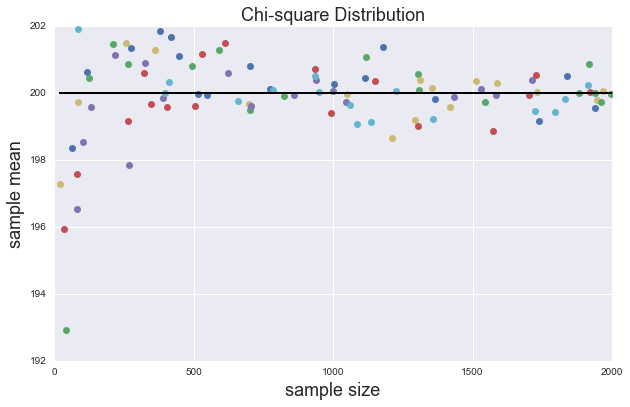

In [64]:
# chi-square distribution
dfree = mymean

mydist['chisq'] = {}
for n in mysize1:
    mydist['chisq'][n] = np.random.chisquare(dfree, size = n)
    
mydist['chisq']['means'] = {}

axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydist['chisq']:
    if not type(nn) == str:
        mydist['chisq']['means'][nn] = mydist['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, mydist['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi-square Distribution', fontsize=18)
        axchisq_mu_n.plot([min(mysize1), max(mysize1)], [dfree, dfree], 'k')

#### The distribution of the means of 100 samples generated from the chi-square distribution is normally distributed and have the mean equal to 200, which if the mean of the parent chi-square distribution.

In [59]:
# generate 100 unique random numbers of different sizes N(N>10 & N<2000)
random.seed(204)
mysize2 = random.sample(range(11,2000), 100)
mysize2 = np.array(mysize2)

In [60]:
print (mysize2, mysize2.shape)

[ 800  180 1172  274  969  671 1395  325 1934  155  145 1352 1968 1724 1650
  311  405  595  482  350  616  761  654 1617 1670  278 1048 1462   80 1889
 1138  902  815 1805 1063  884 1906  375  934 1853 1679 1559 1706  304 1349
 1016 1996 1950  796 1618  733  821 1441 1766 1566  394  141 1887 1079 1161
 1407 1886 1456 1236  916 1381 1470 1135 1932  742 1794 1994 1478  814 1064
  751 1605 1538  366  758 1523  333 1503 1123  341  732 1796  231  958 1974
  587 1580  820 1863 1875 1496  417 1865  695 1609] (100,)


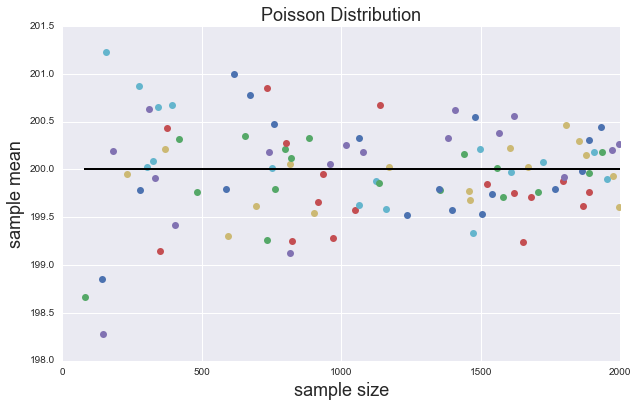

In [61]:
#poisson distribution
lam = mymean

mydist['poiss'] = {}
for n in mysize2:
    mydist['poiss'][n] = np.random.poisson(lam, size = n)
    
mydist['poiss']['means'] = {}

axpoiss_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydist['poiss']:
    if not type(nn) == str:
        mydist['poiss']['means'][nn] = mydist['poiss'][nn].mean()
        #and plot it
        axpoiss_mu_n.plot(nn, mydist['poiss']['means'][nn], 'o')
        axpoiss_mu_n.set_xlabel('sample size', fontsize=18)
        axpoiss_mu_n.set_ylabel('sample mean', fontsize=18)
        axpoiss_mu_n.set_title('Poisson Distribution', fontsize=18)
        axpoiss_mu_n.plot([min(mysize2), max(mysize2)], [lam, lam], 'k')

#### The distribution of the means of 100 samples generated from the Poisson distribution is normally distributed and have the mean equal to 200, which if the mean of the parent Poisson distribution.

In [57]:
# generate 100 unique random numbers of different sizes N(N>10 & N<2000)
random.seed(206)
mysize3 = random.sample(range(11,2000), 100)
mysize3 = np.array(mysize3)

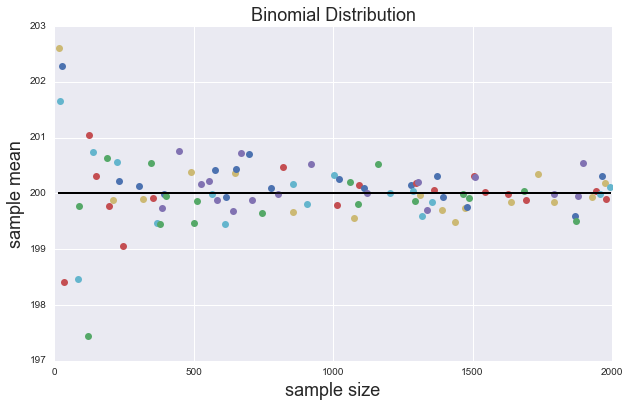

In [58]:
# binomial distribution
N = 400
P = 0.5

mydist['binom'] = {}
for n in mysize3:
    mydist['binom'][n] = np.random.binomial(N, P, size = n)
    
mydist['binom']['means'] = {}

axbinom_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydist['binom']:
    if not type(nn) == str:
        mydist['binom']['means'][nn] = mydist['binom'][nn].mean()
        #and plot it
        axbinom_mu_n.plot(nn, mydist['binom']['means'][nn], 'o')
        axbinom_mu_n.set_xlabel('sample size', fontsize=18)
        axbinom_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinom_mu_n.set_title('Binomial Distribution', fontsize=18)
        axbinom_mu_n.plot([min(mysize3), max(mysize3)], [N * P, N * P], 'k')

#### The distribution of the means of 100 samples generated from the binomial distribution is normally distributed and have the mean equal to 200, which if the mean of the parent binomial distribution.

In [55]:
# generate 100 unique random numbers of different sizes N(N>10 & N<2000)
random.seed(208)
mysize4 = random.sample(range(11,2000), 100)
mysize4 = np.array(mysize4)

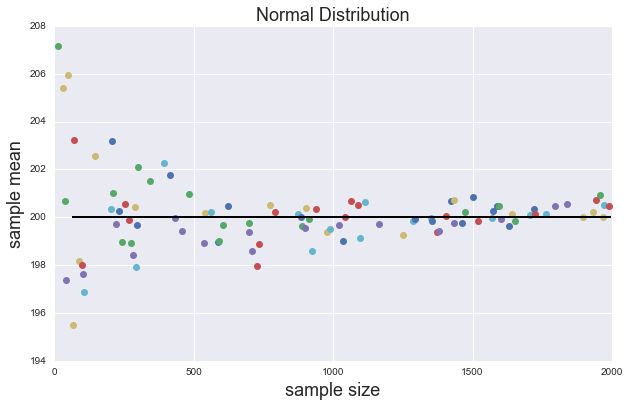

In [56]:
# Normal distribution
mean = mymean

mydist['norm'] = {}
for n in mysize4:
    mydist['norm'][n] = np.random.randn(n) + mean
    
mydist['norm']['means'] = {}

axnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydist['chisq']:
    if not type(nn) == str:
        mydist['norm']['means'][nn] = mydist['chisq'][nn].mean()
        #and plot it
        axnorm_mu_n.plot(nn, mydist['norm']['means'][nn], 'o')
        axnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axnorm_mu_n.set_title('Normal Distribution', fontsize=18)
        axnorm_mu_n.plot([min(mysize4), max(mysize4)], [mean, mean], 'k')

#### The distribution of the means of 100 samples generated from the normal distribution is normally distributed and have the mean equal to 200, which if the mean of the parent normal distribution.

In [53]:
# generate 100 unique random numbers of different sizes N(N>10 & N<2000)
random.seed(210)
mysize5 = random.sample(range(11,2000), 100)
mysize5 = np.array(mysize5)

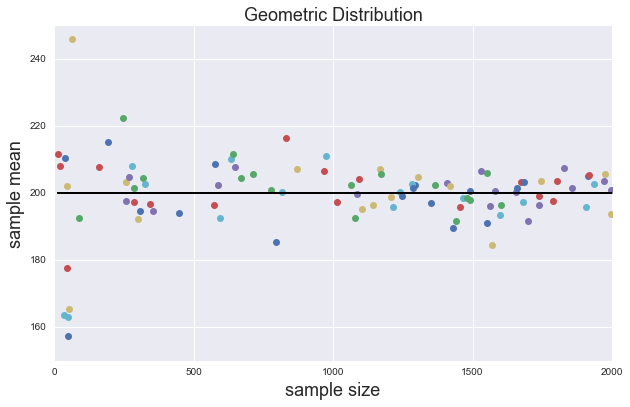

In [54]:
# Geometric distribution
p = 1.0 / mymean


mydist['geom'] = {}
for n in mysize5:
    mydist['geom'][n] = np.random.geometric(p, size = n)
    
mydist['geom']['means'] = {}

axgeom_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydist['geom']:
    if not type(nn) == str:
        mydist['geom']['means'][nn] = mydist['geom'][nn].mean()
        #and plot it
        axgeom_mu_n.plot(nn, mydist['geom']['means'][nn], 'o')
        axgeom_mu_n.set_xlabel('sample size', fontsize=18)
        axgeom_mu_n.set_ylabel('sample mean', fontsize=18)
        axgeom_mu_n.set_title('Geometric Distribution', fontsize=18)
        axgeom_mu_n.plot([min(mysize5), max(mysize5)], [1.0 / p, 1.0 / p], 'k')
        

#### The distribution of the means of 100 samples generated from the geometric distribution is normally distributed and have the mean equal to 200, which if the mean of the parent geometric distribution.

### Plot the distribution of all sample means

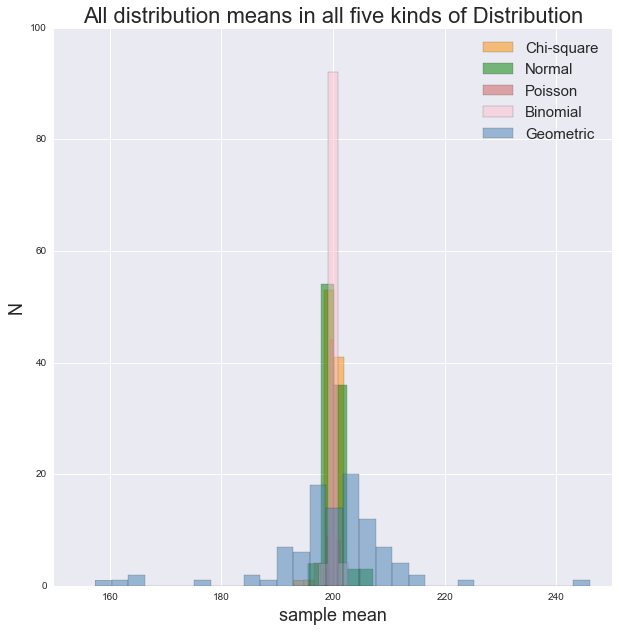

In [108]:
# distribution = ['norm', 'poiss','binom', 'chisq', 'geom']
allmeans1 = list(mydist['chisq']['means'].values())
allmeans2 = list(mydist['norm']['means'].values())
allmeans3 = list(mydist['poiss']['means'].values())
allmeans4 = list(mydist['binom']['means'].values())
allmeans5 = list(mydist['geom']['means'].values())

pl.figure(figsize=(10, 10))

pl.hist(allmeans1, bins=5, color = 'DarkOrange', alpha = 0.5, label = "Chi-square")
pl.hist(allmeans2, bins=5, color = 'Green', alpha = 0.5, label = "Normal")
pl.hist(allmeans3, bins=5, color='IndianRed', alpha = 0.5, label = "Poisson")
pl.hist(allmeans4, bins=3, color='Pink', alpha = 0.5, label = "Binomial")
pl.hist(allmeans5, bins=30, color = 'steelBlue', alpha = 0.5, label = "Geometric")

pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.legend(fontsize=15)
pl.title("All distribution means in all five kinds of Distribution", fontsize = 22)
pl.show()